In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras import losses, callbacks
import matplotlib.pyplot as plt

from dva.autoencoder import Autoencoder

In [2]:
digits = datasets.load_digits(n_class=2)
digits.data.shape

(360, 64)

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [4]:
digits.target

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [5]:
zeroes_idx = np.argwhere(digits.target == 0).ravel()
ones_idx = np.argwhere(digits.target == 1).ravel()

sc = StandardScaler()
data = sc.fit_transform(digits.data)

# making dataset of zeroes with 2 'abnormal' ones
train = np.concatenate((data[zeroes_idx[:-20]], data[ones_idx[0:2]]))
valid = np.concatenate((data[zeroes_idx[-20:-8]], data[ones_idx[2:4]]))
test = np.concatenate((data[zeroes_idx[-8:]], data[ones_idx[5:6]]))

In [6]:
mod = Autoencoder(nodes=(32, 16))
mod.compile(optimizer='adam', loss=losses.MeanSquaredError())
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
mod.fit(train, train, epochs=20, shuffle=True, validation_data=(valid, valid), callbacks=[early_stop])

Epoch 1/20
5/5 [==============================] - 1s 133ms/step - loss: 0.8262 - val_loss: 0.7334
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8151 - val_loss: 0.7255
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8572 - val_loss: 0.7154
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7876 - val_loss: 0.7024
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7516 - val_loss: 0.6863
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7281 - val_loss: 0.6661
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7373 - val_loss: 0.6427
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6515 - val_loss: 0.6169
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6849 - val_loss: 0.5909
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6155 - val_loss: 0.5665
Epoch 11/20
5/5 [====================

In [7]:
loss = ((mod.predict(test) - test) ** 2).sum(1)
(loss - np.min(loss)) / (np.max(loss) - np.min(loss))

array([0.85570204, 0.27988172, 0.24313552, 0.23103237, 0.25108754,
       0.11820144, 0.13196714, 0.        , 1.        ])

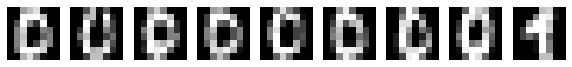

In [8]:
_, axes = plt.subplots(nrows=1, ncols=len(test), figsize=(10, 5))
for ax, image in zip(axes, test):
    ax.set_axis_off()
    ax.imshow(sc.inverse_transform(image).reshape(8, 8), cmap=plt.cm.gray, interpolation='nearest')


In [9]:
avg = test[:-1].mean(0)
loss = ((test - avg) ** 2).sum(1)
(loss - np.min(loss)) / (np.max(loss) - np.min(loss))

array([0.30373401, 0.16616612, 0.03066193, 0.07607594, 0.04676372,
       0.        , 0.20209118, 0.08535758, 1.        ])